<a href="https://colab.research.google.com/github/unisttt/open-implementation/blob/master/regression3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
MAP_FEATURE = False
FEATURE_SCALING = True

In [198]:
from google.colab import files
uploaded = files.upload()

Saving ex1data2.txt to ex1data2 (4).txt


In [0]:
file_name, contents = list(uploaded.items())[0]
if type(contents) is bytes: contents = contents.decode()

In [200]:
print(file_name)
print(contents[0:20])

ex1data2.txt
2104,3,399900
1600,3


In [0]:
df = pd.read_csv(file_name, header=None, sep=",")

In [202]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [203]:
# df => numpy
matrix = df.values
m, n = matrix.shape
print(matrix[:5])
print("({} {})".format(m, n))

[[  2104      3 399900]
 [  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]]
(47 3)


In [0]:
def createDataset():
  X = matrix[:, 0:n-1]
  y = matrix[:, n-1]
  y.shape = (y.size, 1)
  
  return X, y

X, y = createDataset()
m, n = X.shape

In [205]:
np.random.randint(0, 255, 3)

array([ 96, 150, 210])

In [206]:
np.random.rand(3)

array([0.28834558, 0.3490671 , 0.6788857 ])

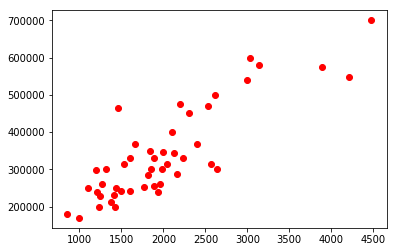

In [207]:
plt.scatter(X[:, 0], y, c="r")

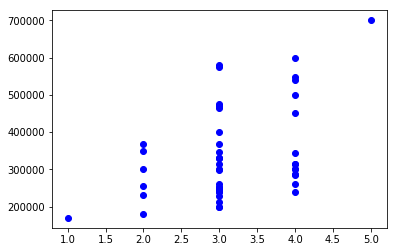

In [208]:
plt.scatter(X[:, 1], y, c="b")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


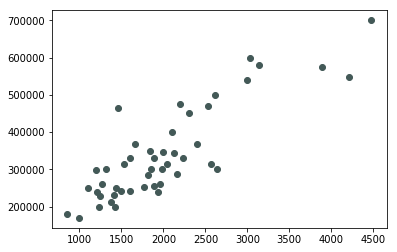

In [209]:
def plotData(X, y):
  m, n = X.shape
  for i in range(n-1):
    rgb =  np.random.rand(3)
    plt.scatter(X[:, i], y, c=rgb)
  
plotData(X, y)

In [210]:
tmp1 = np.random.rand(5)
tmp2 = np.random.rand(5, 1)
tmp3 = np.random.rand(1, 5)
print(tmp1.shape)
print(tmp1)
print(tmp2.shape)
print(tmp2)
print(tmp3.shape)
print(tmp3)
tmp4 = np.append(tmp2, tmp2)
print(tmp4.shape)
print(tmp4)
tmp5 = np.append(tmp2, tmp2, axis=1)
print(tmp5.shape)
print(tmp5)

(5,)
[0.43691779 0.96269346 0.92323531 0.69220959 0.18075505]
(5, 1)
[[0.34830035]
 [0.82348996]
 [0.69561867]
 [0.26436901]
 [0.66284298]]
(1, 5)
[[0.05308344 0.61553297 0.90111011 0.40574045 0.17744381]]
(10,)
[0.34830035 0.82348996 0.69561867 0.26436901 0.66284298 0.34830035
 0.82348996 0.69561867 0.26436901 0.66284298]
(5, 2)
[[0.34830035 0.34830035]
 [0.82348996 0.82348996]
 [0.69561867 0.69561867]
 [0.26436901 0.26436901]
 [0.66284298 0.66284298]]


In [0]:
def featureScaling(x):
  scaled = np.zeros_like(x)
  mean = np.mean(x)
  std = np.std(x)
  scaled = (x - mean) / std
  scaled.shape = (scaled.size, 1)
  return scaled

if FEATURE_SCALING:
  scaled_matrix = np.ones((m, 1))
#   scaled_matrix = np.zeros_like(matrix)
#   scaled_matrix = np.array([])
  for i in range(matrix.shape[1]):
    scaled = featureScaling(matrix[:,i])
    scaled_matrix = np.append(scaled_matrix, scaled, axis=1)
#     scaled_matrix[:, i] = scaled
  scaled_matrix = scaled_matrix[:, 1:]
  m, n = scaled_matrix.shape
  X = scaled_matrix[:, 0:n-1]
  y = scaled_matrix[:, n-1]
  y.shape = (y.size, 1)

In [212]:
def mapfeature(x1, x2):
  x1.shape = (x1.size, 1)
  x2.shape = (x2.size, 1)
  
  degree = 6
  out = np.ones((x1.size, 1))
  for i in range(1, degree + 1):
    for j in range(0, i+1):
      r = x1 ** (i - j) * x2 ** j
      out = np.append(out, r, axis=1)
      
  return out

if MAP_FEATURE:
  X = mapfeature(X[:, 0], X[:, 1])
  m, n = X.shape
else:
  ones = np.ones((m, 1))
  X = np.append(ones, X, axis=1)
print(X.shape)
print(X[0])

(47, 3)
[ 1.          0.13141542 -0.22609337]


In [213]:
theta.shape

(3, 1)

In [214]:
np.max(X)

3.15099325527155

In [0]:
def costFunction(theta, X, y):
  m = len(y)
  J = 0
  grad = np.zeros(np.shape(theta))
  
  h_theta = np.dot(X, theta)
  J = 1 / m / 2 * (h_theta - y)**2
  J = np.sum(J)
  
  grad =  1 / m * np.dot(X.T, (h_theta - y))
  
  return J, grad

In [0]:
theta = np.random.randn(n, 1)
epoch = 100
loss_hist = []
lr = 0.1

for t in range(epoch):
  loss, grad = costFunction(theta, X, y)
  loss_hist = np.append(loss_hist, loss)
  theta -= lr * grad

In [223]:
loss_hist

array([1.52918072e+00, 3.68154227e+01, 1.31000877e+03, 5.04324469e+04,
       1.99355637e+06, 7.95376958e+07, 3.18352850e+09, 1.27562081e+11,
       5.11325690e+12, 2.04988441e+14])

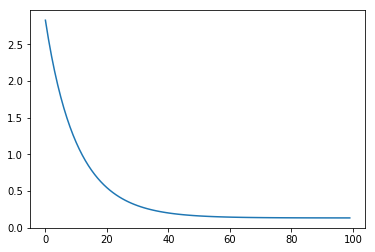

In [230]:
plt.plot(range(epoch), loss_hist)